## Análise exploratória preço e venda de casas 

![alt text](https://img.olx.com.br/images/54/543002030457206.jpg)

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#Reading dataset

base = pd.read_csv('housesprice.csv', parse_dates = ['saledate'])

In [4]:
#Looking at first rows of dataset

base.head()

,saledate,MA,type,bedrooms
0,2007-09-30,441854,house,2
1,2007-12-31,441854,house,2
2,2008-03-31,441854,house,2
3,2008-06-30,441854,house,2
4,2008-09-30,451583,house,2


In [5]:
base.shape

(347, 4)

In [3]:
base.describe()

,MA,bedrooms
count,3.470000e+02,347.000000
mean,5.481320e+05,2.867435
std,1.701934e+05,1.239875
min,3.167510e+05,1.000000
25%,4.277395e+05,2.000000
50%,5.077440e+05,3.000000
75%,6.275155e+05,4.000000
max,1.017752e+06,5.000000


In [38]:
#Veryfing if there is missing values

base.isna().sum()

saledate    0
MA          0
type        0
bedrooms    0
day_week    0
day_year    0
year        0
month       0
dtype: int64

(array([ 5.,  0.,  6.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7., 14.,
         0.,  7., 14.,  7.,  0.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
         7.,  7., 14.,  0.,  7., 14.,  7.,  0.,  7.,  7.,  7.,  7.,  7.,
         7., 14.,  0.,  7., 14.,  7.,  0.,  7., 14.,  7.,  7.]),
 array([732766.  , 732857.32, 732948.64, 733039.96, 733131.28, 733222.6 ,
        733313.92, 733405.24, 733496.56, 733587.88, 733679.2 , 733770.52,
        733861.84, 733953.16, 734044.48, 734135.8 , 734227.12, 734318.44,
        734409.76, 734501.08, 734592.4 , 734683.72, 734775.04, 734866.36,
        734957.68, 735049.  , 735140.32, 735231.64, 735322.96, 735414.28,
        735505.6 , 735596.92, 735688.24, 735779.56, 735870.88, 735962.2 ,
        736053.52, 736144.84, 736236.16, 736327.48, 736418.8 , 736510.12,
        736601.44, 736692.76, 736784.08, 736875.4 , 736966.72, 737058.04,
        737149.36, 737240.68, 737332.  ]),
 <a list of 50 Patch objects>)

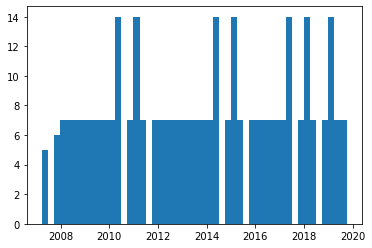

In [39]:
#Creating a new variable and plotting an histogram to see the distribution of the data

dates = base['saledate']
plt.hist(dates, bins = 50)

Here we can see that the number of houses sold is very similar during the years. We have some points where is showing more houses and this is one point to analyze better.

In [40]:
#Creating new columns to facilitate our data understanding

base['day_week'] = base['saledate'].map(lambda date: date.timetuple().tm_wday)
base['day_year'] = base['saledate'].map(lambda date: date.timetuple().tm_yday)
base['year'] = base['saledate'].map(lambda date: date.timetuple().tm_year)
base['month'] = base['saledate'].map(lambda date: date.timetuple().tm_mon)


In [41]:
base.dtypes

saledate    datetime64[ns]
MA                   int64
type                object
bedrooms             int64
day_week             int64
day_year             int64
year                 int64
month                int64
dtype: object

(array([ 1.,  0.,  0.,  1.,  0.,  0., 13.,  0.,  0., 11.]),
 array([ 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.]),
 <a list of 10 Patch objects>)

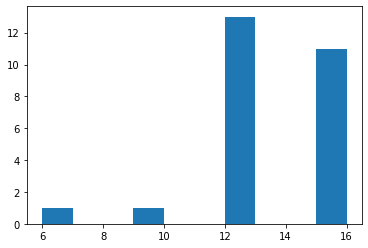

In [59]:
#Creating a new variable and plotting an histogram to see the distribution of the data

year = base['year']
plt.hist(per_year_sales)

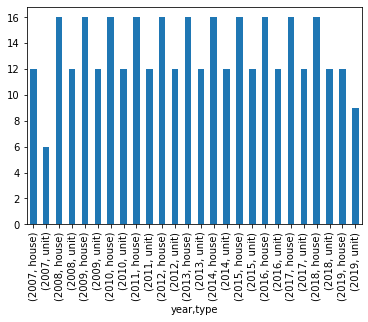

In [65]:
#Creating a new variable and plotting an histogram to see the distribution of the data

per_year_sales = base.groupby('year').type.value_counts()
per_year_sales.plot(kind = 'bar')

Selecting the data by year, we can see that in 2007 was the year with less sales followed by 2019.For the rest of the years, we have the same number of sales. 

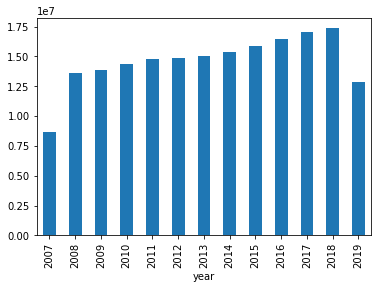

In [68]:
base.groupby('year').MA.sum().plot(kind = 'bar')


Even with the same number of sales, the year where the sales amount is the biggest one is 2018. 

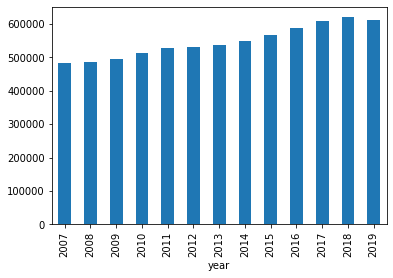

In [69]:
base.groupby('year').MA.mean().plot(kind = 'bar')

In 2018, the average price of houses sold was the highest among all years.

In [12]:
valor = base['MA']

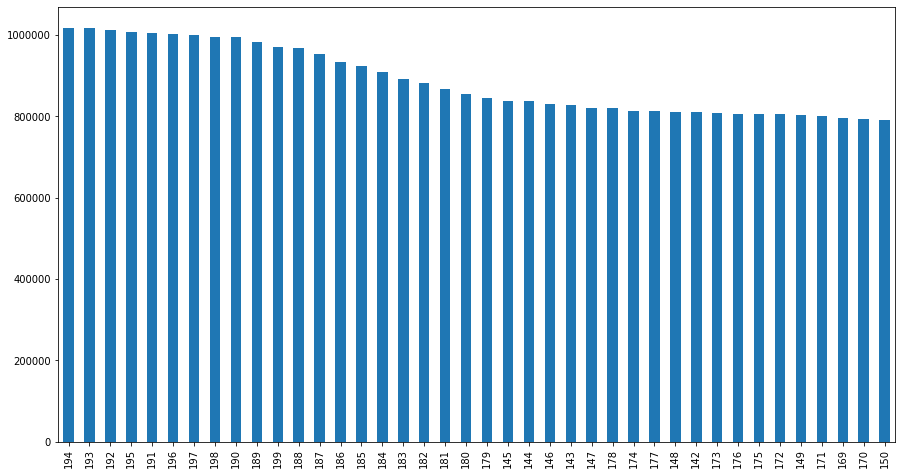

In [13]:

plt.figure(figsize = (15,8))
valor1 = valor.sort_values(ascending = False)
valor1.head(40).plot(kind = 'bar')

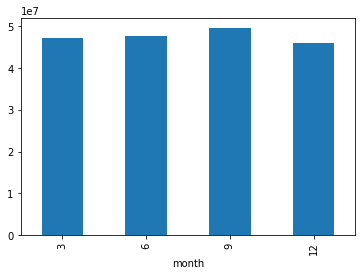

In [55]:

per_month = base.groupby('month').MA.sum().plot(kind = 'bar')

(array([86.,  0.,  0.,  0., 87.,  0.,  0.,  0., 90.,  0.,  0., 84.]),
 array([ 3.  ,  3.75,  4.5 ,  5.25,  6.  ,  6.75,  7.5 ,  8.25,  9.  ,
         9.75, 10.5 , 11.25, 12.  ]),
 <a list of 12 Patch objects>)

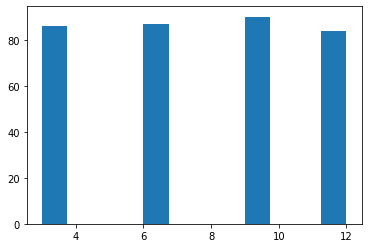

In [64]:
plt.hist(base.month, bins = 12)

In [17]:
base.type.value_counts()

house    200
unit     147
Name: type, dtype: int64

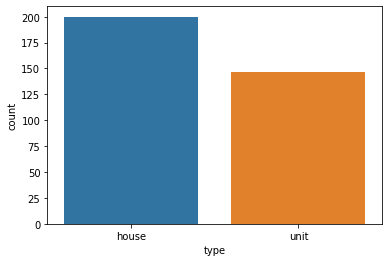

In [18]:
sns.countplot(base.type)

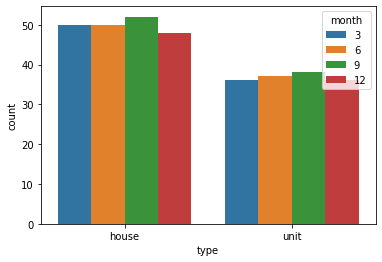

In [19]:
sns.countplot(base.type, hue = base.month)

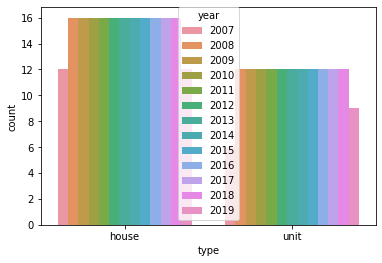

In [20]:
sns.countplot(base.type, hue = base.year)

In [21]:
unit = base[(base['type'] == 'unit')]
house = base[(base['type'] == 'house')]

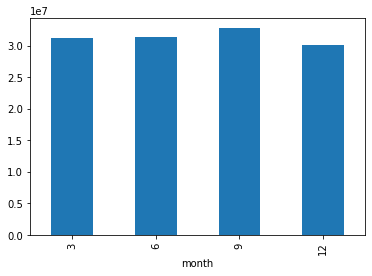

In [22]:
per_month_house = house.groupby('month').MA.sum().plot(kind = 'bar')

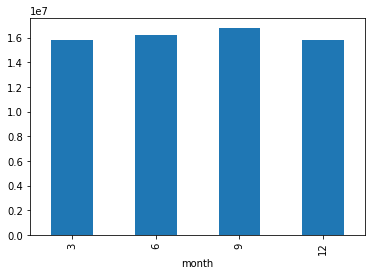

In [23]:
per_month_unit = unit.groupby('month').MA.sum().plot(kind = 'bar')

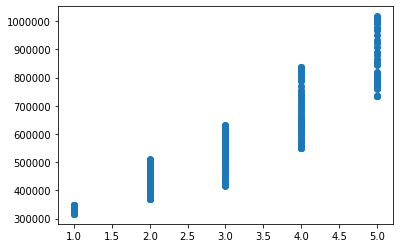

In [24]:
plt.scatter(base.bedrooms, base.MA)

Based on the scatter plot, we can see that depending on the number of bedrooms, the price increases. We have no data available, but we could analyze also the location of the houses to see if this variable would impact in the prices.

In [72]:
base.corr()

,MA,bedrooms,day_week,day_year,year,month
MA,1.000000,0.921603,0.098260,-0.000579,0.263443,-0.000379
bedrooms,0.921603,1.000000,0.010151,-0.002535,-0.013997,-0.002516
day_week,0.098260,0.010151,1.000000,-0.073512,0.287231,-0.073277
day_year,-0.000579,-0.002535,-0.073512,1.000000,-0.085304,0.999987
year,0.263443,-0.013997,0.287231,-0.085304,1.000000,-0.084533
month,-0.000379,-0.002516,-0.073277,0.999987,-0.084533,1.000000


Also, looking at this table, that is proved the positive correlation between the price and the number of bedrooms.

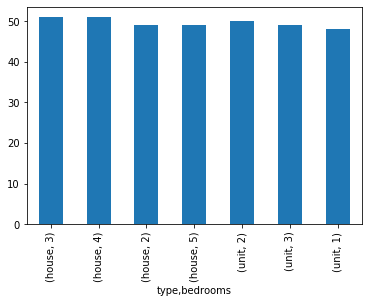

In [25]:
base.groupby('type').bedrooms.value_counts().plot(kind = 'bar')

In [26]:
max_bedrooms_unit = unit[(unit['bedrooms'] <= 5)]

In [27]:
unit.bedrooms.value_counts()

2    50
3    49
1    48
Name: bedrooms, dtype: int64

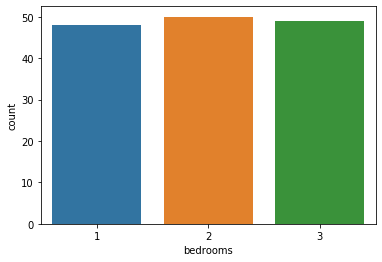

In [28]:
sns.countplot(unit.bedrooms)

In [29]:
max_bedrooms_houses = house[(house['bedrooms'] <= 5)]

In [30]:
house.bedrooms.value_counts()

4    51
3    51
5    49
2    49
Name: bedrooms, dtype: int64

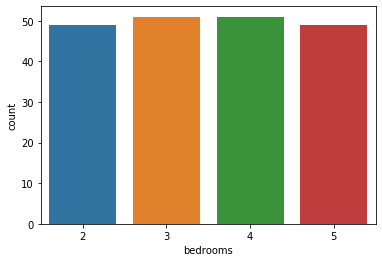

In [31]:
sns.countplot(house.bedrooms)

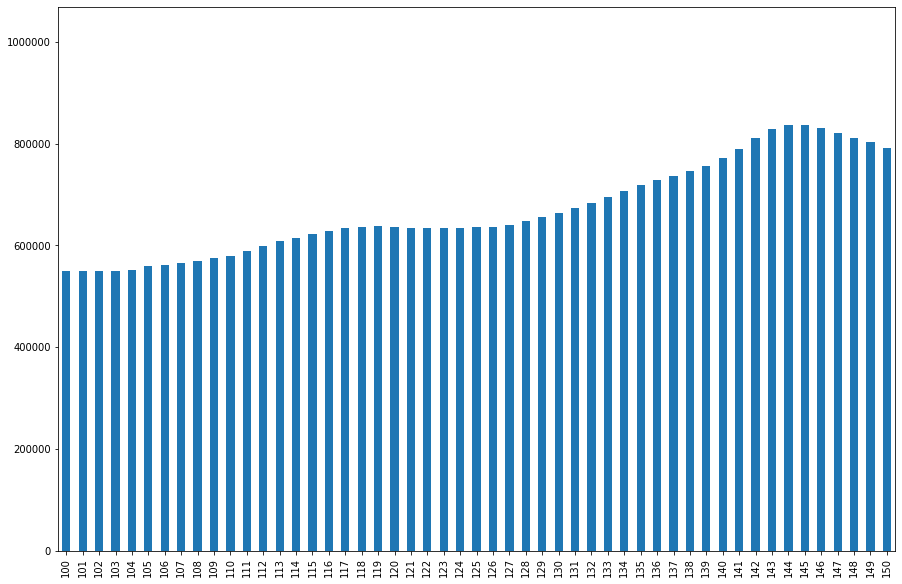

In [32]:
plt.figure(figsize = (15,10))
house_price_bedrooms = house.groupby([(base.bedrooms == 4)]).MA.plot(kind = 'bar')

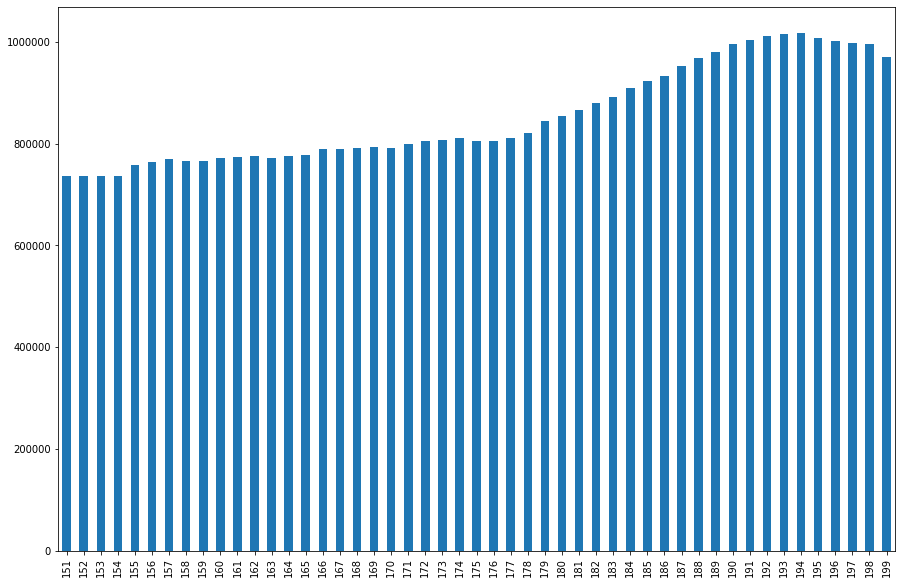

In [33]:
plt.figure(figsize = (15,10))
house_price_bedrooms = house.groupby([(base.bedrooms == 5)]).MA.plot(kind = 'bar')

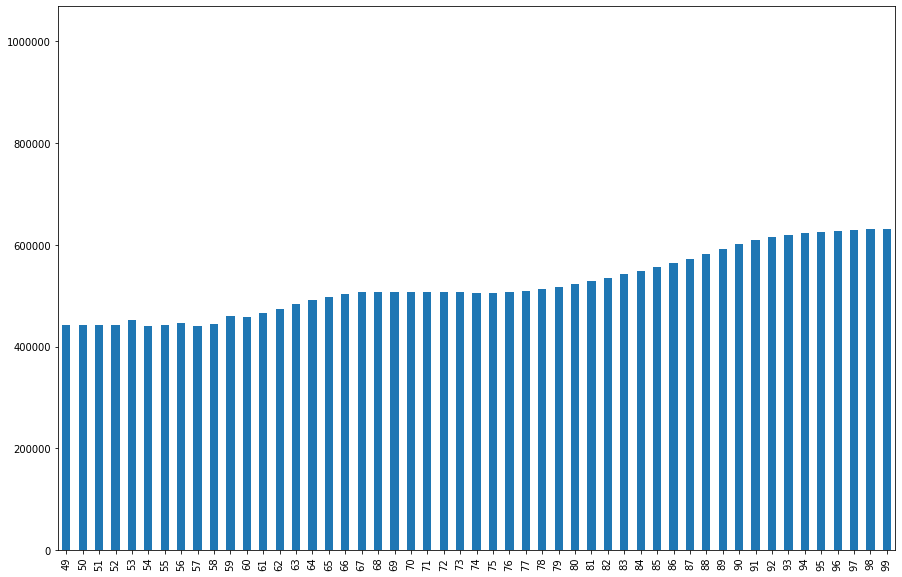

In [34]:
plt.figure(figsize = (15,10))
house_price_bedrooms = house.groupby([(base.bedrooms == 3)]).MA.plot(kind = 'bar')

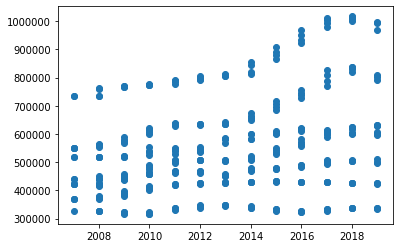

In [70]:
plt.scatter(base.year, base.MA)

In [71]:
base.corr()

,MA,bedrooms,day_week,day_year,year,month
MA,1.000000,0.921603,0.098260,-0.000579,0.263443,-0.000379
bedrooms,0.921603,1.000000,0.010151,-0.002535,-0.013997,-0.002516
day_week,0.098260,0.010151,1.000000,-0.073512,0.287231,-0.073277
day_year,-0.000579,-0.002535,-0.073512,1.000000,-0.085304,0.999987
year,0.263443,-0.013997,0.287231,-0.085304,1.000000,-0.084533
month,-0.000379,-0.002516,-0.073277,0.999987,-0.084533,1.000000
